<a href="https://colab.research.google.com/github/SOWMIYA-BALACHANDAR/PRASUNET-MACHINE-LEARNING/blob/main/ML_TASK_1_LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPLEMENTATION OF A LINEAR REGRESSION MODEL TO PREDICT THE PRICES OF HOUSES BASED ON THEIR SQUARE FOOTAGE AND THE NUMBER OF BEDROOMS AND BATHROOMS**

In [2]:
from google.colab import files
upload = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


**Importing Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Loading Training Data**

In [4]:
df_train = pd.read_csv("/content/train.csv")

In [5]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Loading Test Data**

In [8]:
df_test = pd.read_csv("/content/test.csv")

In [9]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

**Exploring Train and Test Data**

In [11]:
df_train.shape

(1460, 81)

In [12]:
df_test.shape

(1459, 80)

In [13]:
t = (df_train.dtypes == 'object')
object_cols = list(t[t].index)
print("Categorical variables:")
print(object_cols)
print('-'*50)

t = (df_train.dtypes == 'int')
num_cols = list(t[t].index)
print("Integer variables:")
print(num_cols)
print('-'*50)

t = (df_train.dtypes == 'float')
num_cols = list(t[t].index)
print("Float variables:")
print('-'*50)

Categorical variables:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
--------------------------------------------------
Integer variables:
['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCa

In [14]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [16]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [17]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [18]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [19]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [20]:
df = [df_train,df_test]
df_merged = pd.concat(df).reset_index(drop=True)

In [21]:
df_merged

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [22]:
df_merged.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

<Axes: title={'center': 'Number Unique Values Of Categorical Features'}>

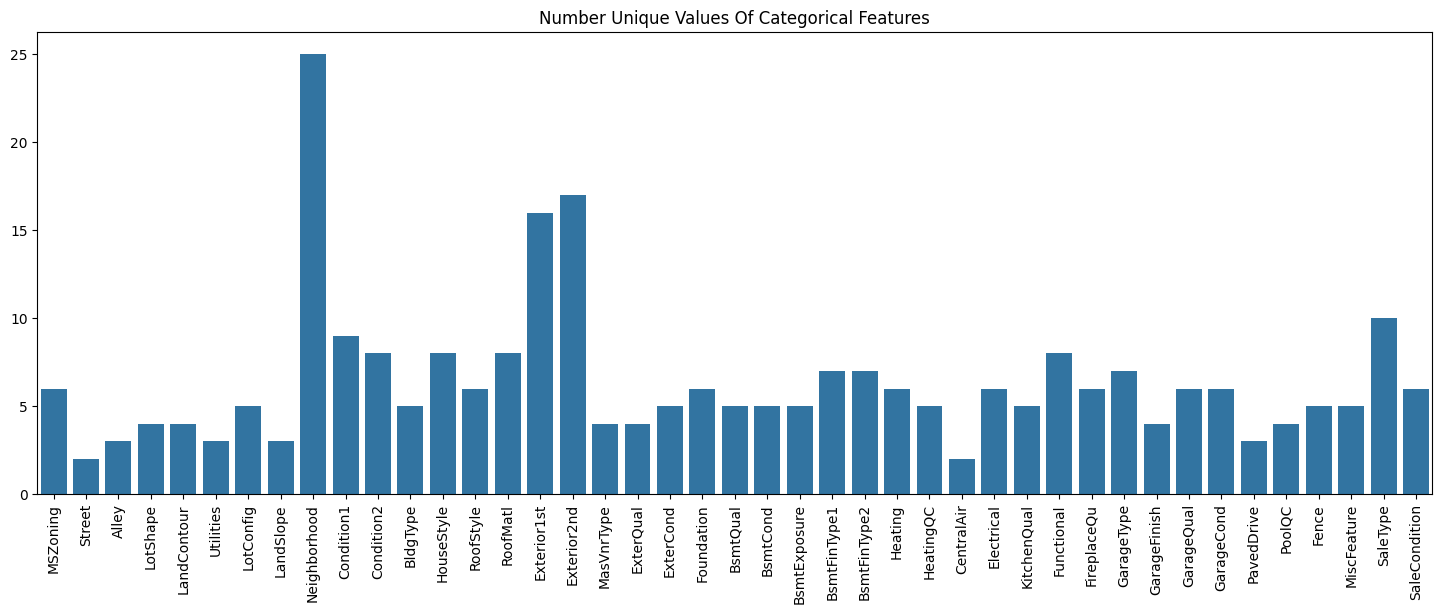

In [23]:
unique_values = []
for col in object_cols:
  unique_values.append(df_merged[col].unique().size)
plt.figure(figsize=(18,6))
plt.title('Number Unique Values Of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

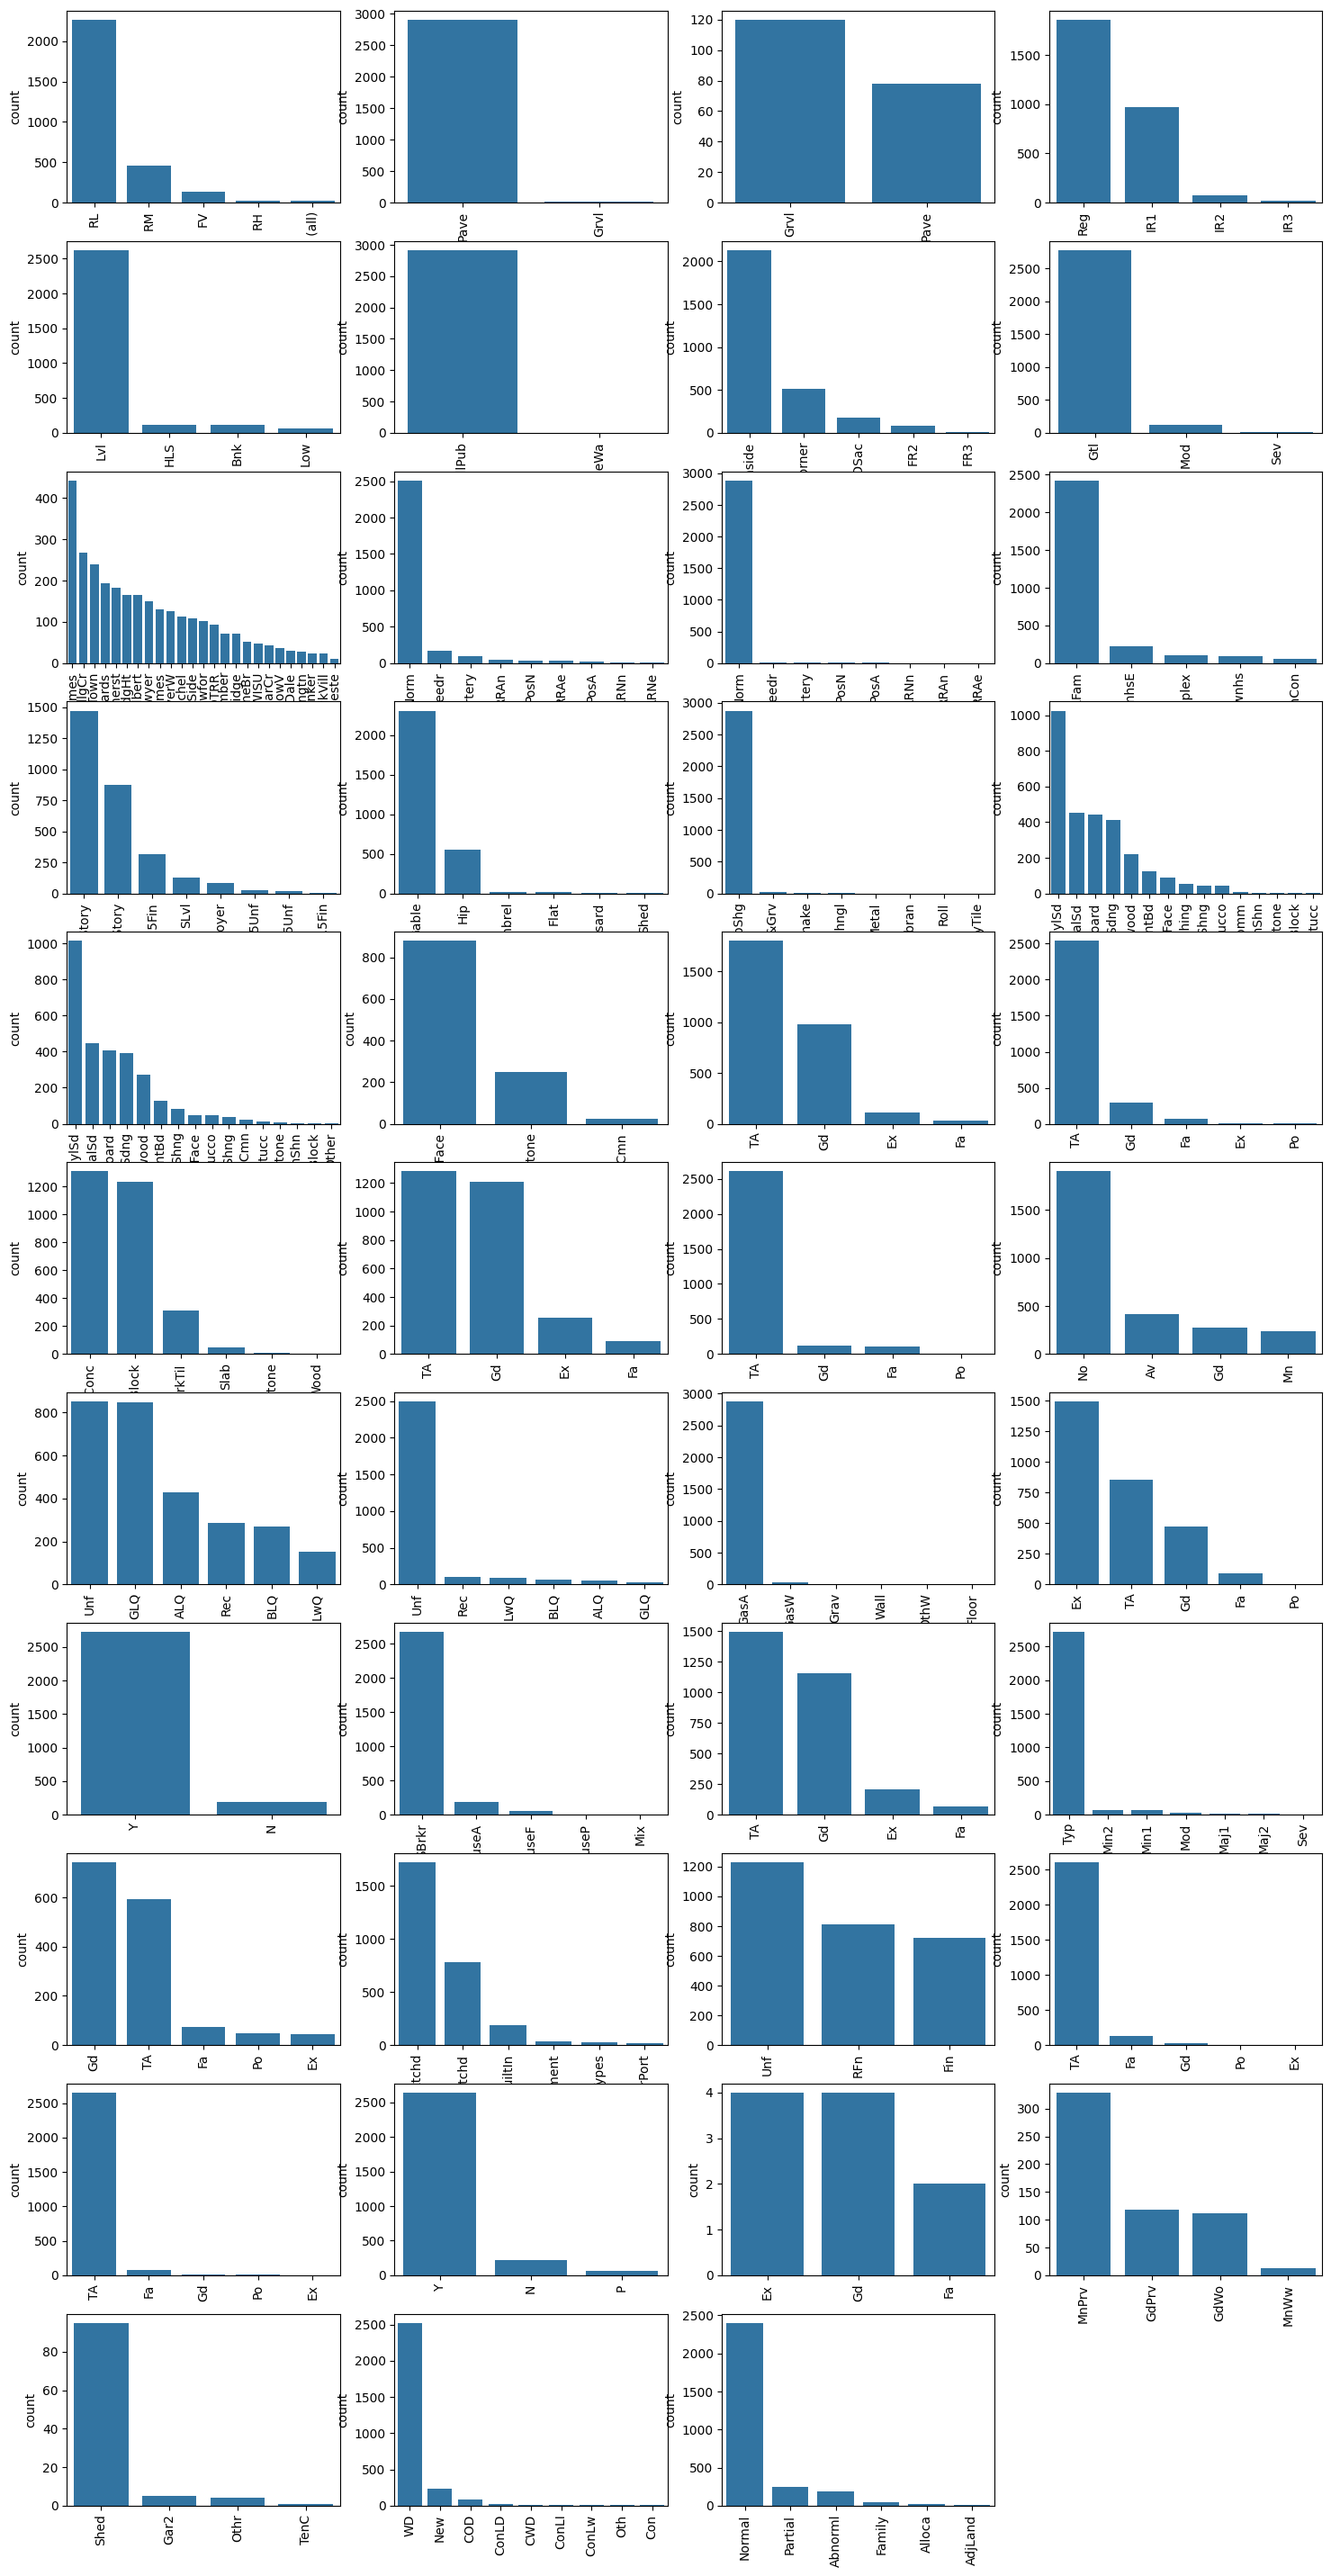

In [24]:
plt.figure(figsize=(18,36))
plt.title('Distribution Categorical Features')
plt.xticks(rotation=90)
index = 1
for col in object_cols:
  y = df_merged[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

In [25]:
df_merged.drop(columns='Id', inplace=True); print('Drop Id \n')
df_merged['MSZoning'] = df_merged['MSZoning'].fillna(df_merged['MSZoning'].mode()[0])
df_merged['LotFrontage'] = df_merged['LotFrontage'].fillna(df_merged['LotFrontage'].mean())
df_merged.drop(columns='Alley', inplace=True); print('Drop Alley \n')

# df_merged['Utilities'] = df_merged['Utilities'].fillna(df_merged['Utilities'].mode()[0])
print(df_merged['Utilities'].value_counts())
df_merged.drop(columns='Utilities', inplace=True); print('Drop Utilities \n')
df_merged['Exterior1st'] = df_merged['Exterior1st'].fillna(df_merged['Exterior1st'].mode()[0])
df_merged['Exterior2nd'] = df_merged['Exterior2nd'].fillna(df_merged['Exterior2nd'].mode()[0])
df_merged['MasVnrType'] = df_merged['MasVnrType'].fillna(df_merged['MasVnrType'].mode()[0])
df_merged['MasVnrArea'] = df_merged['MasVnrArea'].fillna(df_merged['MasVnrArea'].mean())
df_merged['Electrical'] = df_merged['Electrical'].fillna(df_merged['Electrical'].mode()[0])
df_merged['KitchenQual'] = df_merged['KitchenQual'].fillna(df_merged['KitchenQual'].mode()[0])
df_merged['Functional'] = df_merged['Functional'].fillna(df_merged['Functional'].mode()[0])

# df_merged.loc[(df_merged['Fireplaces'] != 0) & (df_merged['FireplaceQu'].isnull()) ][['FireplaceQu','Fireplaces']]
df_merged['FireplaceQu'] = df_merged['FireplaceQu'].fillna('NA'); print('FirePlaceQu: Fill NA values for missing values \n')
df_merged.loc[(df_merged['PoolQC'].isnull()) & df_merged['PoolArea']>0][['PoolQC','PoolArea']]
df_merged.at[2599,'PoolQC'] = df_merged['PoolQC'].mode()[0]; print('PoolQC: Use mode for missing value with non-zero PoolArea \n')
df_merged['PoolQC'] = df_merged['PoolQC'].fillna('NA'); print('PoolQC: Use NA for remaining missing values \n')

df_merged['SaleType'].fillna(df_merged['SaleType'].mode()[0], inplace=True)
df_merged.drop(columns=['Fence','MiscFeature','SalePrice'], inplace=True); print('Drop Fence, MiscFeature and SalePrice\n')

# Basement Features
# df_merged.loc[df_merged['BsmtQual'].isnull()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']].head()
# df_merged.loc[df_merged['TotalBsmtSF'].isnull()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','Bsmt FinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']]
print('Fill missing values of Basement features with NA or 0 \n')
df_merged['BsmtQual'] = df_merged['BsmtQual'].fillna('NA')
df_merged['BsmtCond'] = df_merged['BsmtCond'].fillna('NA')
df_merged['BsmtExposure'] = df_merged['BsmtExposure'].fillna('NA')
df_merged['BsmtFinType1'] = df_merged['BsmtFinType1'].fillna('NA')
df_merged['BsmtFinType2'] = df_merged['BsmtFinType2'].fillna('NA')

df_merged['BsmtFinSF1'] = df_merged['BsmtFinSF1'].fillna(int(0))
df_merged['BsmtFinSF2'] = df_merged['BsmtFinSF2'].fillna(int(0))
df_merged['BsmtUnfSF'] = df_merged['BsmtUnfSF'].fillna(int(0))
df_merged['TotalBsmtSF'] = df_merged['TotalBsmtSF'].fillna(int(0))
df_merged['BsmtFullBath'] = df_merged['BsmtFullBath'].fillna(int(0))
df_merged['BsmtHalfBath'] = df_merged['BsmtHalfBath'].fillna(int(0))

# Garage Features
# df_merged.loc[df_merged['GarageCond'].isnull()][['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']].head()
print('Fill missing values of Garage features with NA or 0 \n')
df_merged['GarageType'] = df_merged['GarageType'].fillna('NA')
df_merged['GarageFinish'] = df_merged['GarageFinish'].fillna('NA')
df_merged['GarageCond'] = df_merged['GarageCond'].fillna('NA')
df_merged['GarageQual'] = df_merged['GarageQual'].fillna('NA')
df_merged['GarageCars'] = df_merged['GarageCars'].fillna(int(0))
df_merged['GarageArea'] = df_merged['GarageArea'].fillna(int(0))
df_merged['GarageYrBlt'] = df_merged['GarageYrBlt'].fillna(int(0))


Drop Id 

Drop Alley 

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64
Drop Utilities 

FirePlaceQu: Fill NA values for missing values 

PoolQC: Use mode for missing value with non-zero PoolArea 

PoolQC: Use NA for remaining missing values 

Drop Fence, MiscFeature and SalePrice

Fill missing values of Basement features with NA or 0 

Fill missing values of Garage features with NA or 0 



In [26]:
df_merged

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,NA,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,0,NA,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,NA,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,272,0,0,0,NA,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,0,0,NA,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,Reg,Lvl,Inside,Gtl,MeadowV,...,0,0,0,0,NA,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,Reg,Lvl,Inside,Gtl,MeadowV,...,0,0,0,0,NA,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,Reg,Lvl,Inside,Gtl,Mitchel,...,0,0,0,0,NA,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,Reg,Lvl,Inside,Gtl,Mitchel,...,0,0,0,0,NA,700,7,2006,WD,Normal


In [27]:
df_merged.isnull().sum().sum()

0

**Data Preprocessing**

In [28]:
from sklearn.preprocessing import OneHotEncoder
s = (df_merged.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',len(object_cols))

Categorical variables:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'SaleType', 'SaleCondition']
No. of. categorical features:  39


In [29]:
OH_encoder = OneHotEncoder(sparse=False)
OH_column = pd.DataFrame(OH_encoder.fit_transform(df_merged[object_cols]))
OH_column.index = df_merged.index
OH_column.columns = OH_encoder.get_feature_names_out()
df_final = df_merged.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_column], axis=1)
df_final.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
print('Shape Of Final Dataset:', df_final.shape)
print('Shape Of Train Dataset:', df_train.shape)
print('Shape Of Test Dataset:',  df_test.shape)

X_Train = pd.DataFrame(df_final[:1460])
X_Test  = pd.DataFrame(df_final[1460:])
Y_Train = df_train['SalePrice']

print('\nCheck that the datasets are consistent:\n')
print('Shape Of X_Train Dataset', X_Train.shape)
print('Shape Of Y_Train Dataset:', Y_Train.shape)
print('Shape Of X_Test Dataset:',  X_Test.shape)

Shape Of Final Dataset: (2919, 286)
Shape Of Train Dataset: (1460, 81)
Shape Of Test Dataset: (1459, 80)

Check that the datasets are consistent:

Shape Of X_Train Dataset (1460, 286)
Shape Of Y_Train Dataset: (1460,)
Shape Of X_Test Dataset: (1459, 286)


**Modeling**

In [31]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Split the training set into training and validation set

X_train, X_valid, Y_train, Y_valid = train_test_split(X_Train, Y_Train, train_size=0.8, test_size=0.2,random_state=0)

**Prediction and Submission**

In [32]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(X_train, Y_train)
Y_pred = RFR.predict(X_valid)
print('\nRMSE: ', np.sqrt(mean_squared_error(Y_valid, Y_pred)))
print('\nMAE: ', mean_absolute_error(Y_valid, Y_pred))
print('\nR2: ', r2_score(Y_valid, Y_pred))


RMSE:  33058.92137519089

MAE:  17288.463664383562

R2:  0.8417439868824684


In [33]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(X_train, Y_train)
Y_pred = GBR.predict(X_valid)
print('\nRMSE: ', np.sqrt(mean_squared_error(Y_valid, Y_pred)))
print('\nMAE: ', mean_absolute_error(Y_valid, Y_pred))
print('\nR2: ', r2_score(Y_valid, Y_pred))


RMSE:  28795.90729383395

MAE:  16983.621445768087

R2:  0.8799272672882745


In [34]:
from xgboost import XGBRegressor
XGBR = XGBRegressor(learning_rate=0.03,n_estimators=200,objective='reg:squarederror')
XGBR.fit(X_train,Y_train)
Y_pred = XGBR.predict(X_valid)
print('\nRMSE: ', np.sqrt(mean_squared_error(Y_valid, Y_pred)))
print('\nMAE: ', mean_absolute_error(Y_valid, Y_pred))
print('\nR2: ', r2_score(Y_valid, Y_pred))


RMSE:  32414.482930969687

MAE:  16368.88592947346

R2:  0.8478538182614963


In [35]:
from sklearn.model_selection import GridSearchCV
model = XGBRegressor()

In [37]:
n_estimators   = [100, 200, 500]
learning_rates = [0.03,0.1,0.3]
objectives     = ['reg:squarederror']

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'learning_rate':learning_rates,
    'objective' : objectives
    }

grid_cv = GridSearchCV(estimator = model,
            param_grid = hyperparameter_grid,
            scoring = 'neg_mean_absolute_error',
            return_train_score = True)

grid_cv.fit(X_Train,Y_Train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.03, 0.1, 0.3],
                         'n_estimators': [100, 200, 500],
                         'objective': ['reg:squarederror']},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [38]:
grid_cv.best_score_

-16295.977514982875

In [39]:
grid_cv.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [40]:
regressor = grid_cv.best_estimator_
Y_pred = regressor.predict(X_valid)
print(mean_absolute_error(Y_valid, Y_pred))

3279.4007518193494


In [41]:
#Submission
Y_Pred = regressor.predict(X_Test)
Y_Pred

array([124229.25 , 158805.4  , 182252.2  , ..., 160710.28 , 112429.766,
       211912.3  ], dtype=float32)

In [42]:
Y_Pred.shape

(1459,)

In [43]:
new = pd.DataFrame()
new['Id'] = df_test['Id']
new['SalePrice'] = Y_Pred

In [44]:
new

,Id,SalePrice
0,1461,124229.250000
1,1462,158805.406250
2,1463,182252.203125
3,1464,187259.640625
4,1465,203663.640625
...,...,...
1454,2915,80032.828125
1455,2916,79242.187500
1456,2917,160710.281250
1457,2918,112429.765625


In [45]:
new1 = new.iloc[:, 0:]
new1

,Id,SalePrice
0,1461,124229.250000
1,1462,158805.406250
2,1463,182252.203125
3,1464,187259.640625
4,1465,203663.640625
...,...,...
1454,2915,80032.828125
1455,2916,79242.187500
1456,2917,160710.281250
1457,2918,112429.765625


In [46]:
new1.to_csv('Submission.csv',index=False)